# Error Handling, Logging, and Data Manipulation

Question 1 : What is the difference between multithreading and multiprocessing?

   - Multithreading means running several threads inside one single process. All threads share the same memory space and can easily communicate with each other. It is useful when a program spends more time waiting, like downloading files or reading data from the internet. But in Python, because of the Global Interpreter Lock (GIL), only one thread runs at a time, so it doesn't give true parallel execution.

    - Multiprocessing, on the other hand, creates multiple processes where each process has its own memory space. This allows true parallel execution, which means tasks can really run at the same time on different CPU cores. It is best for tasks that need a lot of CPU power, like calculations or data processing. However, multiprocessing uses more memory and takes more time to start new processes.



Question 2 : What are the challenges associated with memory management in Python?

  - In Python, memory management is automatic, but it still has some challenges. Sometimes, memory leaks can happen due to circular references where two objects keep referring to each other. The garbage collector may not remove them properly. Also, because Python creates many small objects and uses dynamic typing, it can use more memory compared to other languages like C. Managing large data structures efficiently can also be difficult. Another challenge is balancing between performance and memory usage, as garbage collection can slow down the program at times.


Question 3:Write a Python program that logs an error message to a log file when a
division by zero exception occurs.

In [7]:
import logging

logging.basicConfig(filename='error.log', level=logging.ERROR, format='%(asctime)s - %(levelname)s - %(message)s')

def divide(a, b):
  try:
    result = a / b
    return result
  except ZeroDivisionError:
    logging.error("Division by zero error occurred!")
    return None

numerator = 10
denominator = 0

result = divide(numerator, denominator)

if result is not None:
  print(f"Result: {result}")
else:
  print("Could not perform division due to an error. Check error.log for details.")

ERROR:root:Division by zero error occurred!


Could not perform division due to an error. Check error.log for details.


Question 4:Write a Python program that reads from one file and writes its content to
another file.


In [8]:
def copy_file_content(source_file, destination_file):
  try:
    with open(source_file, 'r') as infile:
      content = infile.read()

    with open(destination_file, 'w') as outfile:
      outfile.write(content)

    print(f"Content from '{source_file}' successfully copied to '{destination_file}'.")

  except FileNotFoundError:
    print(f"Error: The source file '{source_file}' was not found.")
  except Exception as e:
    print(f"An error occurred: {e}")

with open('source.txt', 'w') as f:
  f.write("This is the content of the source file.\n")
  f.write("This line will also be copied.")

copy_file_content('source.txt', 'destination.txt')

copy_file_content('non_existent_source.txt', 'another_destination.txt')

Content from 'source.txt' successfully copied to 'destination.txt'.
Error: The source file 'non_existent_source.txt' was not found.


Question 5: Write a program that handles both IndexError and KeyError using a
try-except block.


In [6]:
def handle_errors(data, index, key):

  try:

    if isinstance(data, list):
      value = data[index]
      print(f"Value at index {index}: {value}")


    elif isinstance(data, dict):
      value = data[key]
      print(f"Value for key '{key}': {value}")


  except IndexError:
    print(f"Error: Invalid index {index}. The index is out of range.")

  except KeyError:
    print(f"Error: Invalid key '{key}'. The key does not exist.")

  except Exception as e:
    print(f"An unexpected error occurred: {e}")


my_list = [1, 2, 3]
handle_errors(my_list, 1, None)
handle_errors(my_list, 5, None)

my_dict = {'a': 1, 'b': 2}
handle_errors(my_dict, None, 'a')
handle_errors(my_dict, None, 'c')


Value at index 1: 2
Error: Invalid index 5. The index is out of range.
Value for key 'a': 1
Error: Invalid key 'c'. The key does not exist.


Question 6: What are the differences between NumPy arrays and Python lists?

  - NumPy arrays and Python lists both serve to store collections of data, yet they possess fundamental distinctions. A primary difference lies in their data type handling: NumPy arrays are optimized for homogeneous data, meaning all elements must be of the same type, which significantly boosts their efficiency for numerical tasks. In contrast, Python lists offer flexibility by allowing elements of diverse data types within a single list. This homogeneity in NumPy contributes to superior performance in numerical computations, especially with large datasets, as NumPy is built on C implementations optimized for mathematical operations, unlike the more general-purpose Python lists. Furthermore, NumPy arrays are more memory-efficient for numerical data due to their fixed data type and contiguous memory allocation. When it comes to functionality, NumPy provides an extensive collection of built-in mathematical and statistical functions that operate directly on arrays, a feature not inherently available for lists. While Python lists are dynamic in size, allowing for easy addition or removal of elements, NumPy arrays typically have a fixed size upon creation. NumPy also excels in ease of use for numerical operations with its specialized syntax and functions, including a powerful feature called broadcasting that simplifies operations between arrays of different shapes. NumPy arrays can readily handle multi-dimensional data, such as matrices and tensors, which is more cumbersome to achieve with nested Python lists. Element-wise operations are default in NumPy arrays, whereas with lists, you'd commonly rely on loops or list comprehensions. Consequently, NumPy arrays are the go-to choice for scientific computing, data analysis, and machine learning where numerical efficiency is paramount, while Python lists are more versatile for general programming tasks and handling heterogeneous data.

Question 7:Explain the difference between apply() and map() in Pandas.

  - map(): This method is designed to work specifically on a Pandas Series (a single column of a DataFrame). It is used to substitute each value in a Series with another value. You can pass a dictionary, a Series, or a function to map(). When you use a dictionary or a Series, it performs a lookup and replaces values. When you pass a function, it applies that function to each individual element in the Series. map() is generally faster than apply() when working on a Series.

  - apply(): This method is more versatile and can be used on both Series and DataFrames.
  When used on a Series, apply() behaves similarly to map() when you pass a function, applying the function to each element. However, map() is often preferred for Series-wise element transformations due to its potential performance advantages.
  When used on a DataFrame, apply() can apply a function along either axis (rows or columns). This is useful for applying functions that operate on multiple elements at once, such as calculating summary statistics for each row or column, or transforming entire rows or columns based on some logic. apply() is more flexible than map() when you need to perform operations that involve more than just a simple element-wise transformation on a single column


Question 8: Create a histogram using Seaborn to visualize a distribution.

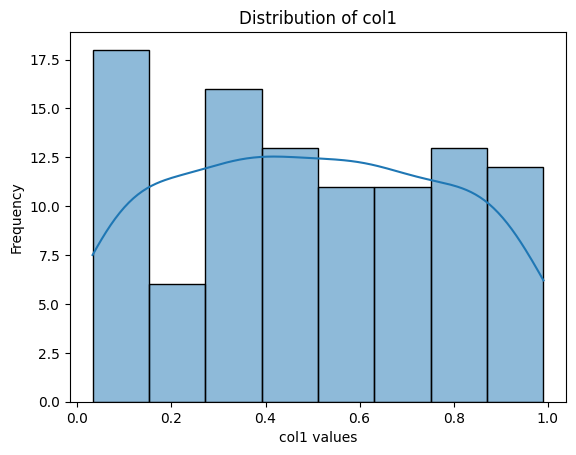

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='col1', kde=True)
plt.title('Distribution of col1')
plt.xlabel('col1 values')
plt.ylabel('Frequency')
plt.show()


Question 9: Use Pandas to load a CSV file and display its first 5 rows.

In [2]:
import pandas as pd
import numpy as np

data = {
    'col1': np.random.rand(100),
    'col2': np.random.rand(100),
    'col3': np.random.rand(100),
    'col4': np.random.rand(100),
    'col5': np.random.rand(100)
}
dummy_df = pd.DataFrame(data)

dummy_df.to_csv('data.csv', index=False)

print("Created dummy 'data.csv' file.")


df = pd.read_csv('data.csv')
print(df.head())

Created dummy 'data.csv' file.
       col1      col2      col3      col4      col5
0  0.314853  0.490428  0.765419  0.249073  0.289033
1  0.468733  0.732467  0.577638  0.670812  0.129905
2  0.524132  0.928183  0.651158  0.440784  0.000434
3  0.094316  0.275575  0.103178  0.304852  0.661202
4  0.453389  0.137530  0.690888  0.707230  0.560229


Question 10: Calculate the correlation matrix using Seaborn and visualize it with a
heatmap

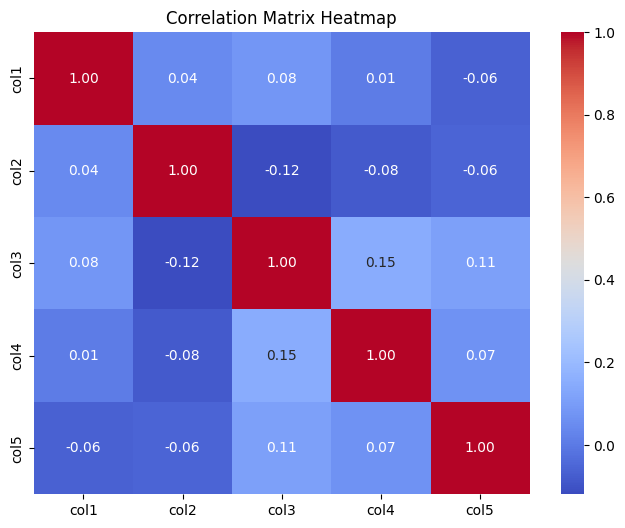

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()